Each previously observed street sign was divided into a 4x4 grid, and the red, green, and blue level for each of the 16 center pixels is recorded as illustrated here.
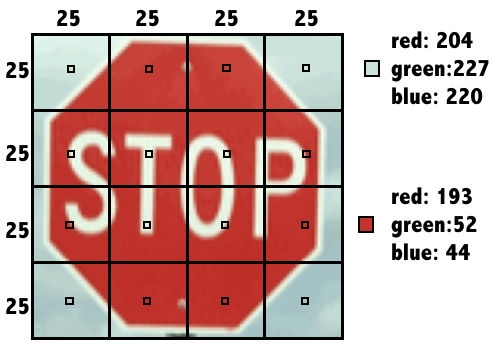



In [3]:
# Load the 'class' package
library(class)

In [8]:
signs <- read.csv("knn_traffic_signs.csv")
head(signs)

id,sample,sign_type,r1,g1,b1,r2,g2,b2,r3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
1,train,pedestrian,155,228,251,135,188,101,156,...,244,172,228,235,177,235,244,22,52,53
2,train,pedestrian,142,217,242,166,204,44,142,...,237,182,228,143,171,228,196,164,227,237
3,train,pedestrian,57,54,50,187,201,68,51,...,59,76,84,22,82,93,17,58,60,60
4,train,pedestrian,22,35,41,171,178,26,19,...,34,64,61,4,211,222,78,19,27,29
5,train,pedestrian,169,179,170,231,254,27,97,...,91,188,205,78,125,147,20,160,183,187
6,train,pedestrian,75,67,60,131,89,53,214,...,26,197,114,21,123,74,22,180,107,26


In [33]:
test_signs <- signs[ which(signs$sample=='test'), ]
train_signs <- signs[ which(signs$sample=='train'), ]
test_signs <- test_signs[ c(-1,-2) ]
train_signs <- train_signs[ c(-1,-2) ]

In [34]:
# Create a vector of labels
sign_types <- train_signs$sign_type

In [36]:
signs_pred <- knn(train = train_signs[-1], test = test_signs[-1], cl = sign_types)

In [38]:
# Create a confusion matrix of the actual versus predicted values
signs_actual <- test_signs[,1]
table(signs_pred, signs_actual)

# Compute the accuracy
mean(signs_pred == signs_actual)

            signs_actual
signs_pred   pedestrian speed stop
  pedestrian         19     2    0
  speed               0    17    0
  stop                0     2   19

[1] 0.9322034

In [130]:
kNN <- data.frame(matrix(0, 400, 2))
names(kNN) <- c("Accuracy", "K")
i=0
while (i<400){
for (k in 1:20){
 kNN[k+i,1] <- mean( knn(train = train_signs[-1], test = test_signs[-1], cl = sign_types, k = k)== signs_actual)
 kNN[k+i,2] <- k
   } 
    i=i+k}

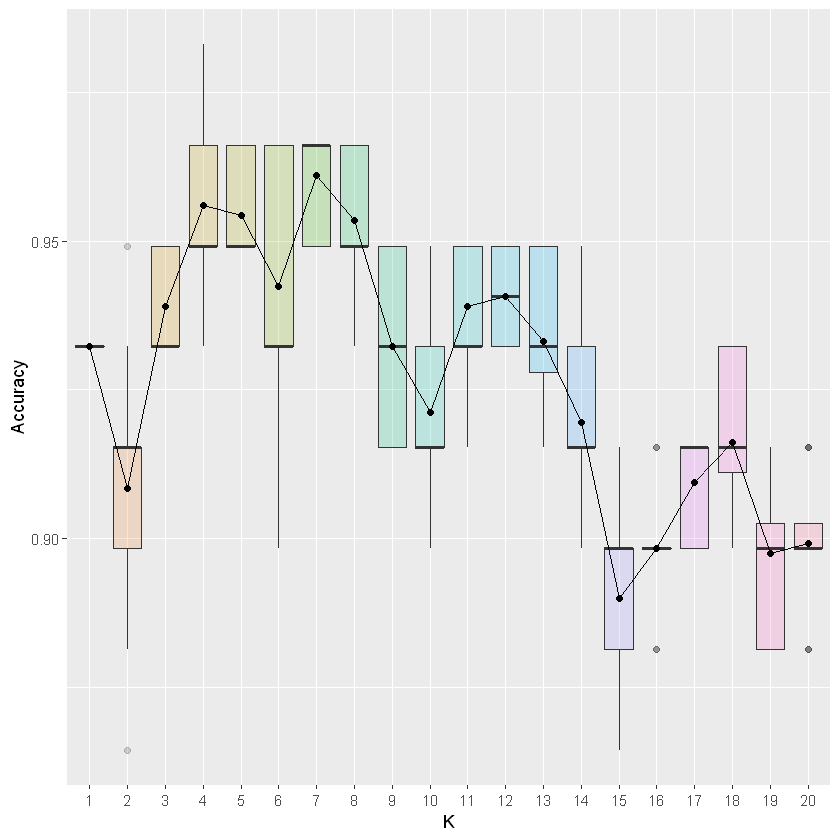

In [131]:
library(ggplot2)


#barplot:
ggplot(kNN, aes(x=as.factor(K) , y= Accuracy, fill=as.factor(K) ))  + 
    geom_boxplot( alpha=0.2)+ 
    stat_summary(fun.y=mean, geom="line", aes(group=1))  + 
    stat_summary(fun.y=mean, geom="point") +
    theme(legend.position="none")+
    xlab("K")